In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

import utils

In [2]:
SEED = 42

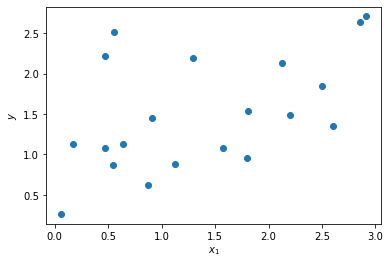

In [3]:
np.random.seed(SEED)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
utils.plot_xy(x, y)

In [4]:
x_test = np.linspace(0, 3, 100).reshape(100, 1)

In [5]:
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=SEED)
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [6]:
ridge_reg = Ridge(alpha=1, solver='sag', random_state=SEED)
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

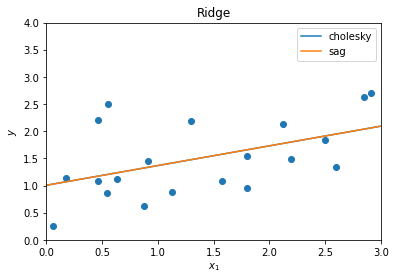

In [7]:
models = [
    ('cholesky', Ridge(alpha=1, solver='cholesky', random_state=SEED)),
    ('sag', Ridge(alpha=1, solver='sag', random_state=SEED))
]
utils.plot_models(x, y, models, axis=[0, 3, 0, 4])
plt.title("Ridge")
plt.show()

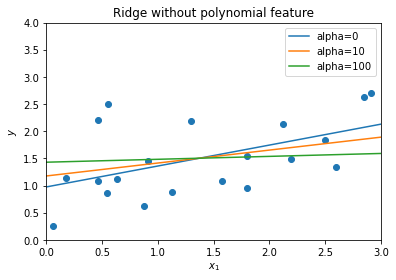

In [8]:
models = [
    ('alpha=0', Ridge(alpha=0)),
    ('alpha=10', Ridge(alpha=10)),
    ('alpha=100', Ridge(alpha=100)),
]
utils.plot_models(x, y, models, axis=[0, 3, 0, 4])
plt.title("Ridge without polynomial feature")
plt.show()

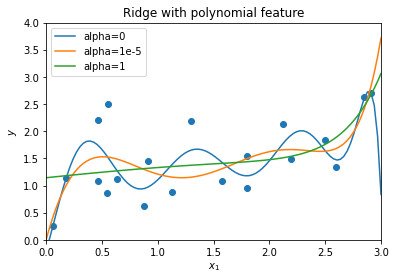

In [9]:
models = [
    ('alpha=0', Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('regul_reg', Ridge(alpha=0)),
    ])),
    ('alpha=1e-5', Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('regul_reg', Ridge(alpha=1e-5)),
    ])),
    ('alpha=1', Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('regul_reg', Ridge(alpha=1)),
    ])),
]
utils.plot_models(x, y, models, axis=[0, 3, 0, 4])
plt.title("Ridge with polynomial feature")
plt.show()

In [10]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

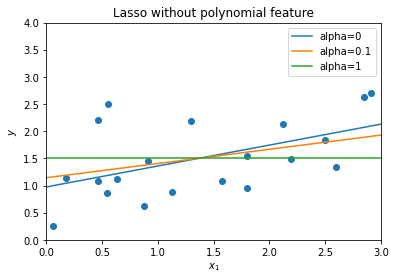

In [11]:
models = [
#     ('alpha=0', Lasso(alpha=0)),
    ('alpha=0', LinearRegression()),
    ('alpha=0.1', Lasso(alpha=0.1)),
    ('alpha=1', Lasso(alpha=1)),
]
utils.plot_models(x, y, models, axis=[0, 3, 0, 4])
plt.title("Lasso without polynomial feature")
plt.show()

d:\dev\Miniconda3\envs\py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


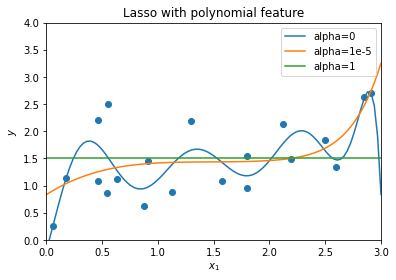

In [12]:
models = [
    ('alpha=0', Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('regul_reg', LinearRegression()),
    ])),
    ('alpha=1e-5', Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('regul_reg', Lasso(alpha=1e-7)),
    ])),
    ('alpha=1', Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('regul_reg', Lasso(alpha=1)),
    ])),
]
utils.plot_models(x, y, models, axis=[0, 3, 0, 4])
plt.title("Lasso with polynomial feature")
plt.show()

In [13]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([1.54333232])